### Kaplan–Meier step curves
Comparing monotherapy with combination therapy in both RFS and DMFS.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Each CSV should have columns: time (weeks) and RFS or DMFS survival (percentage 0-100)
rfs_combo_df = pd.read_csv('rfs_combo.csv')
rfs_mono_df = pd.read_csv('rfs_mono.csv')
dmfs_combo_df = pd.read_csv('dmfs_combo.csv')
dmfs_mono_df = pd.read_csv('dmfs_mono.csv')

# LOCF to 160 weeks
def append_locf_to_160(df):
    # Create a new row for index 160 using the last row's values
    df.rename(columns={'RFS': 'Survival', 'DMFS': 'Survival'}, inplace=True)
    last_RFS_value = df['Survival'].iloc[-1]
    new_row = {'Weeks': 160, 'Survival': last_RFS_value}
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    return df

dataframes = [rfs_combo_df, rfs_mono_df, dmfs_combo_df, dmfs_mono_df]
updated_dataframes = [append_locf_to_160(df) for df in dataframes]
rfs_combo_df, rfs_mono_df, dmfs_combo_df, dmfs_mono_df = updated_dataframes

In [27]:
import matplotlib.font_manager as fm
import matplotlib as mpl

# Set the global default font
#mpl.font_manager.findSystemFonts()
mpl.rcParams['font.family'] = "calibri"
mpl.rcParams['font.size'] = 13.5

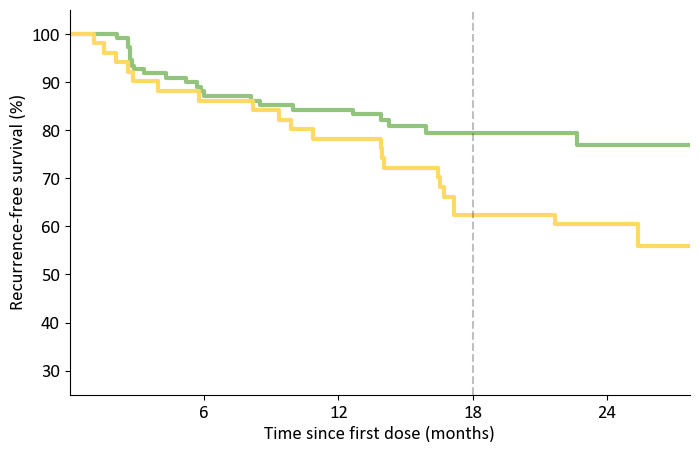

In [65]:
# Plot Kaplan–Meier style step curves
plt.figure(figsize=(8, 5))
plt.step(rfs_combo_df['Weeks'], rfs_combo_df['Survival'], where='post', label='Combination Therapy', color = '#93c47d', linewidth=3)
plt.step(rfs_mono_df['Weeks'], rfs_mono_df['Survival'], where='post', label='Monotherapy', color = '#ffd966', linewidth=3)


plt.xlabel('Time since first dose (months)')
plt.ylabel('Recurrence-free survival (%)')
ax = plt.subplot()
ax.axvline(78, color='black', linestyle='--',alpha=0.25)
ax.set_xticks([26, 52, 78, 104])
ax.set_xticklabels([6, 12, 18, 24])
plt.xlim(0, 120)
plt.ylim(25, 105)
#plt.legend() # Redundant: already call this out on poster via consistent colour scheme
#plt.title('Recurrence-Free Survival (RFS) Kaplan–Meier Curves') # Looks better wo title for now
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


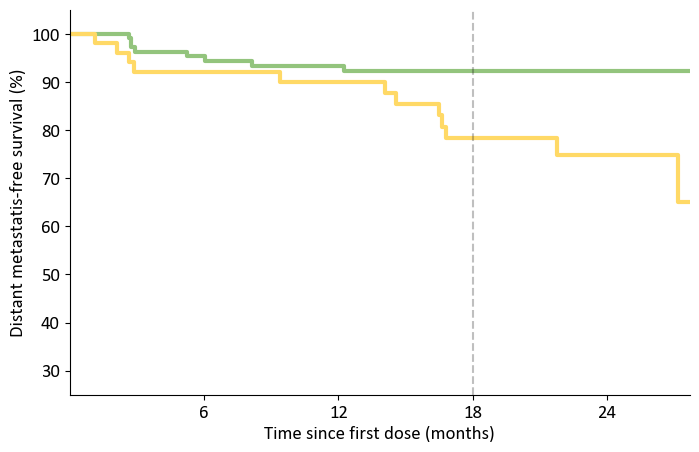

In [59]:
# DMFS plot
# Plot Kaplan–Meier style step curves
plt.figure(figsize=(8, 5))
plt.step(dmfs_combo_df['Weeks'], dmfs_combo_df['Survival'], where='post', label='Combination Therapy', color = '#93c47d', linewidth=3)
plt.step(dmfs_mono_df['Weeks'], dmfs_mono_df['Survival'], where='post', label='Monotherapy', color = '#ffd966', linewidth=3)

plt.xlabel('Time since first dose (months)')
plt.ylabel('Distant metastatis-free survival (%)')
ax = plt.subplot()
ax.axvline(78, color='black', linestyle='--',alpha=0.25)
ax.set_xticks([26, 52, 78, 104])
ax.set_xticklabels([6, 12, 18, 24])
plt.xlim(0, 120)
plt.ylim(25, 105)
# ax.spines['top'].set_visible(False) # not sure if that looks better?
# ax.spines['right'].set_visible(False)
plt.show()



### First jobs done so far:
- Plot a simple step function graph
- Appending each df to continue out to 160 weeks
- Rename RFS/DMFScolumn to Survival so we can use functions across all dfs if needed

### What do we need to do next?
- [DONE] Tweak the axis so we can better see 100% (covered by graph outline square by default)
- [DONE] Calculate months from weeks
- [DONE] Use months at tick marks 6, 12, 18, 24 for our x-axis
- [DONE] Consider vertical dotted line at 18 months
- Consider annotation at the 18 month line detailing significance (we'll do this in-poster)
- [DONE] Consider more aesthetic font settings and line colouring/thickness

### Forest plot
First plot of this is pretty clean. A few things to do:
- [DONE] Change ticks to be 0.1, 1 and 10 rather than powers of 10.
-  [DONE] Extend the axis to the next point either side
-  [DONE] Remove any rows that aren't very interesting to keep this lean: Countries, TMB, PD-L1 indeterminate
-  [DONE] Adjust font so it's consistent with the poster (changed global font)


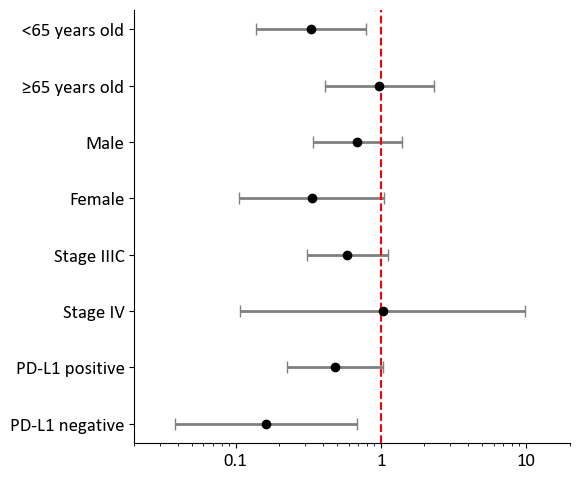

In [63]:
# Creating foxplots of HR for different study sub groups
df = pd.read_csv('Subgroup_HR.csv')
#print(subgroups)

import matplotlib.pyplot as plt

subgroups_to_drop = [
    'PD-L1 indeterminate',
    'Australia',
    'USA',
    'Non-TMB-high',
    'TMB-high',
    '>=3 prior cancer surgeries',
    '2 prior cancer surgeries',
    '1 prior cancer surgery']
df = df[~df['Subgroup'].isin(subgroups_to_drop)] # remove countries, TMB, PD-L1 indeterminate

df['Subgroup'] = df['Subgroup'].replace(">=65 years old","≥65 years old")

df = df[::-1] # reverses the order of rows (each H line is plotted on top of the last) 
fig, ax = plt.subplots(figsize=(6, 5))

# Plot horizontal lines
ax.errorbar(df['HR'], df['Subgroup'], xerr=[df['HR'] - df['Lower_CI'], df['Upper_CI'] - df['HR']], fmt='o', color='black', ecolor='gray', capsize=4, linewidth=2)

# Add vertical line at HR = 1 (no effect line)
ax.axvline(1, color='red', linestyle='--')

# Customize axes
#ax.set_xlabel('Hazard Ratio (HR)')
#ax.set_title('Hazard Ratio (HR) by Subgroup') # we'll cover title in-poster
ax.set_xscale('log')
ax.set_xticks([0.01, 0.1, 1, 10, 100])
ax.set_xticklabels(['0.01', '0.1', '1', '10', '100'])
ax.set_xlim(0.02, 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()


### Experiment with visualisations for Adverse Event data
- [DONE] Data clean-up: remove spaces at the end of category names
- [DONE] Replace Grade >3 for equal to or more and Amend "Any treatment-related AE leading to death'" to be the same as "leading to death"
- We'll want to combine some categories:
  - [DONE] Let's combine all discontinuations
  - [DONE] Let's delete 'Leading to death' (only 3 instances) and call them out with an asterisk on-poster.
- [DONE] We need to sort colours: Use HEX codes from the g-slides colours. Mono Yellow: #ffd966, Combo Green: #93c47d
- [DONE] Decided Severity scale as such: discontinuation is the most minor, then Grade 3+, and "serious" last.
- Going to need a separate colour pallette for each therapy group + a way to use the right one for each plot


In [171]:
# Bring in the data table
df = pd.read_csv('Adverse_Events.csv')
#print(df.head())


   Index AE-category                         Therapy group  \
0      2      Any AE  mRNA-4157 plus pembrolizumab (n=104)   
1      3      Any AE  mRNA-4157 plus pembrolizumab (n=104)   
2      4      Any AE  mRNA-4157 plus pembrolizumab (n=104)   
3      5      Any AE  mRNA-4157 plus pembrolizumab (n=104)   
4      6      Any AE  mRNA-4157 plus pembrolizumab (n=104)   

                                      Severity  Values  Percentages  
0                                     Grade >3      36           35  
1                                   Serious AE      21           20  
2      Leading to discontinuation of mRNA-4157      16           15  
3  Leading to discontinuation of pembrolizumab      26           25  
4                             Leading to death       3            3  


In [173]:
# Cleaning
df['Severity'] = df['Severity'].replace("Grade >3","Grade ≥3")
df['Severity'] = df['Severity'].replace('Any treatment-related AE leading to death','Leading to death')
df['Severity'] = df['Severity'].replace('Leading to discontinuation of mRNA-4157 and/or pembrolizumab ','Leading to discontinuation of mRNA-4157 and/or pembrolizumab')
#print(df['Severity'])


In [ ]:
# Let's remove 'leading to death' as only '3'. We can call out via asterisk
df = df[df['Severity'] != "Leading to death"].reset_index(drop=True)
print(df)

In [ ]:
# Add the new two new rows you need: Any-AE, mono and combo: discontinued either. (this will enable combining "discontinuation" sub-cats)
new_row = {'Index': 100, 'AE-category': "Any AE", 'Therapy group': "mRNA-4157 plus pembrolizumab (n=104)", 
           'Severity' : "Leading to discontinuation of mRNA-4157 and/or pembrolizumab", "Values": 0, "Percentages": 0}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
new_row = {'Index': 100, 'AE-category': "Any AE", 'Therapy group': "Pembrolizumab (n=50)", 
           'Severity' : "Leading to discontinuation of mRNA-4157 and/or pembrolizumab", "Values": 0, "Percentages": 0}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

#print(df.tail())

In [ ]:
#Let's create a for loop that mimics the plotting one. For each mono/combo; for each any/rna/pbz; 
# filter for those two as well as these severities and add them

# Define severities to merge
to_merge = [
    "Leading to discontinuation of mRNA-4157",
    "Leading to discontinuation of pembrolizumab"
]
target = "Leading to discontinuation of mRNA-4157 and/or pembrolizumab"

# Loop through each combination of Source and Therapy
for source in df['AE-category'].unique():
    for therapy in df['Therapy group'].unique():
        mask = (df['AE-category'] == source) & (df['Therapy group'] == therapy)

        # Sum the rows to merge
        rows_to_merge = df[mask & df['Severity'].isin(to_merge)]
        if rows_to_merge.empty:
            continue  # skip if none found

        sum_value = rows_to_merge['Values'].sum()
        sum_percent = rows_to_merge['Percentages'].sum()

        # Update the target row
        target_mask = mask & (df['Severity'] == target)
        if target_mask.any():
            df.loc[target_mask, 'Values'] += sum_value
            df.loc[target_mask, 'Percentages'] += sum_percent
        else:
            # If it doesn't exist, create the row
            new_row = {
                'AE-category': source,
                'Therapy group': therapy,
                'Severity': target,
                'Values': sum_value,
                'Percentages': sum_percent
            }
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

        # Drop the original rows
        df = df[~(mask & df['Severity'].isin(to_merge))]

# Reset index
df = df.reset_index(drop=True)
print(df)

In [191]:
# Get updated unique categories
sources = df['AE-category'].unique()
therapies = df['Therapy group'].unique()
severities = df['Severity'].unique()
combo_colours = {'Mild': '#aed6f1', 'Moderate': '#5dade2', 'Severe': '#21618c'}
mono_colours = {'Grade ≥3': '#aed6f1', 'Serious AE': '#5dade2', 'Leading to discontinuation of mRNA-4157 and/or pembrolizumab': '#21618c'}
# print(ae_sources)
# print(therapy_types)
print(severities)



['Grade ≥3' 'Serious AE'
 'Leading to discontinuation of mRNA-4157 and/or pembrolizumab']


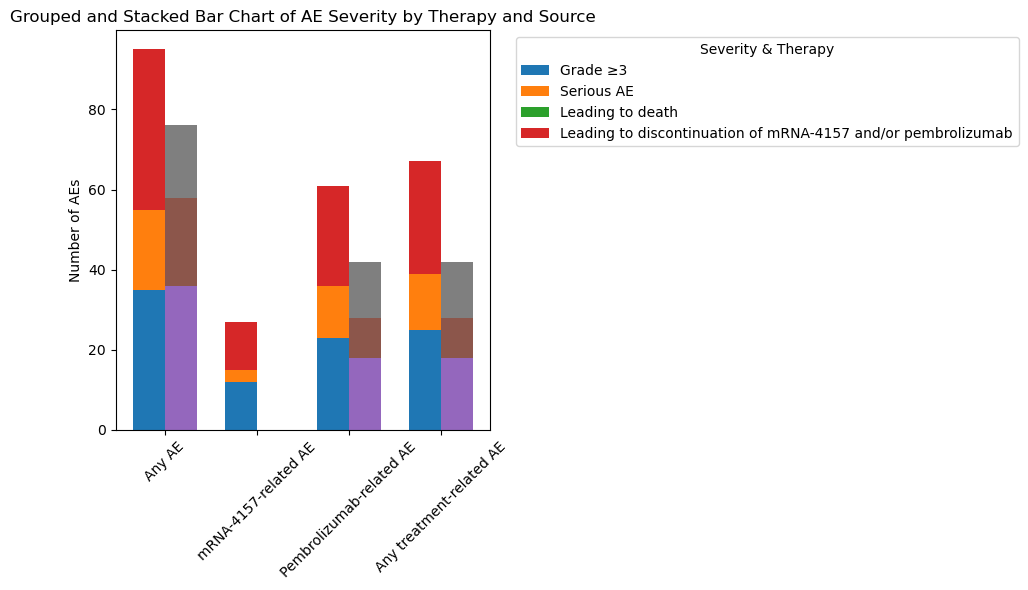

In [189]:
# Plotting
x = np.arange(len(sources))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Loop through therapies and plot bars side by side (grouped)
for i, therapy in enumerate(therapies):
    bottoms = np.zeros(len(sources))  # start stacking from zero
    for severity in severities:
        # Extract matching data values in correct order
        percentages = []
        for source in sources:
            match = df[(df['AE-category'] == source) & (df['Therapy group'] == therapy) & (df['Severity'] == severity)]
            if not match.empty:
                percentages.append(match['Percentages'].values[0])
            else:
                percentages.append(0)
        
        # x positions offset: e.g. Combo left, Mono right
        pos = x + (i - 0.5) * bar_width
        ax.bar(pos, percentages, bar_width, bottom=bottoms, label=severity if i == 0 else "")
        bottoms += percentages  # stack next severity

# Labeling
ax.set_xticks(x)
ax.set_xticklabels(ae_sources)
plt.xticks(rotation=45) #temporary solution for quick readability
ax.set_ylabel('Number of AEs')
ax.set_title('Grouped and Stacked Bar Chart of AE Severity by Therapy and Source')
ax.legend(title='Severity & Therapy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### New Plan for AE visualisation
Including all of these categories makes the graph too busy and misleading: stacking is suggestive of proportions that add to 100% when in fact there is almost certainly overlap between sub-categories per AE. Let's pivot to just show Grade>3. As these results are best respresentative of the rest and called out specifically by the paper.

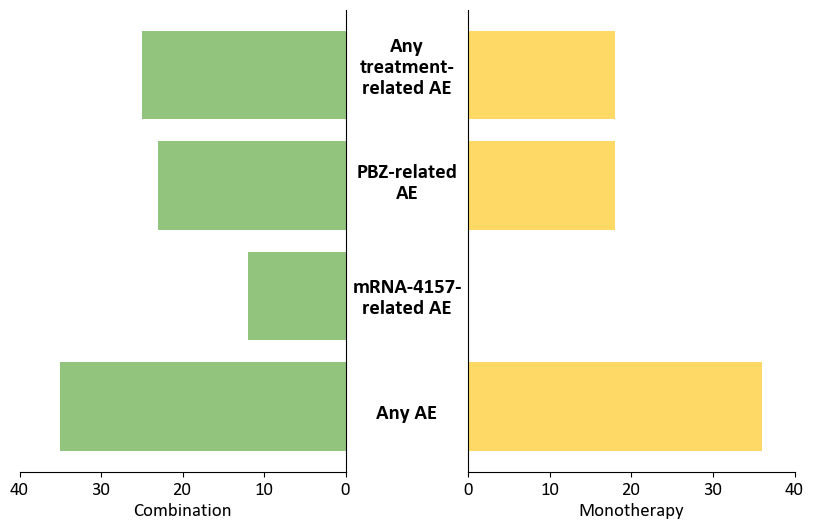

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data in wide format
data = pd.DataFrame({
    "Category": ["Any AE", "mRNA-4157-related AE", "PBZ-related AE", "Any treatment-related AE"],
    "values1": [35, 12, 23, 25], # Combo therapy: RNA + PBZ
    "values2": [36, 0, 18, 18] # Mono therapy: PBZ only
})

# Using GridSpec to allocate 3 columns:
    # Left for left-hand bars
    # Center for the category labels (gap)
    # Right for right-hand bars
# Width ratios are adjustable, try gap width at 0.3
gap_width = 0.3
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[1, gap_width, 1], wspace=0.05)

# Create left, center, and right axes
ax_left = fig.add_subplot(gs[0, 0])
ax_center = fig.add_subplot(gs[0, 1])
ax_right = fig.add_subplot(gs[0, 2])

# Create common y positions for the categories
y = np.arange(len(data))

# Use a common scale for both x-axes.
scale = 40

# Left panel: Plot values1 bars that extend leftward.
# Do this by plotting the negative of values1.
ax_left.barh(y, -data['values1'], color='#93c47d', align='center')
ax_left.set_xlabel('Combination')
# Set the x-axis so that 0 is at the right edge and bars extend to the left.
ax_left.set_xlim(-scale, 0)
# Relabel left x-axis ticks to display as positive values
ax_left.set_xticks(ax_left.get_xticks())  # Keep default positions
ax_left.set_xticklabels([f"{abs(x):.0f}" for x in ax_left.get_xticks()])  # Convert negatives to positive

# Remove the y ticks as we'll cover those in the center panel.
ax_left.set_yticks([])

# Remove outside spines
ax_left.spines['top'].set_visible(False)
ax_left.spines['left'].set_visible(False)


# Right panel: Plot values2 bars extending rightward.
ax_right.barh(y, data['values2'], color='#ffd966', align='center')
ax_right.set_xlabel('Monotherapy')
ax_right.set_xlim(0, scale)
ax_right.set_yticks([])
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)

# Center panel: solely for displaying category labels.
ax_center.axis('off')  # hide axes lines and ticks


# Adjust text placement in the center panel
import textwrap
for i, label in enumerate(data['Category']):
    wrapped_label = "\n".join(textwrap.wrap(label, width=12)) 
    ax_center.text(0.5, (i + 0.5) / len(data), wrapped_label,
                   ha='center', va='center', fontsize=15, fontweight='bold',
                   transform=ax_center.transAxes)


# Add an overall title
#plt.suptitle("Grade ≥3 adverse events (AE) as percentage of group population", fontsize=18) # we'll add these in-poster

plt.show()
